In [1]:
%pip install python-binance mplfinance

     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 3.1MB 36.9MB/s 
     |████████████████████████████████| 3.2MB 51.3MB/s 
     |████████████████████████████████| 491kB 52.4MB/s 
     |████████████████████████████████| 184kB 58.5MB/s 
     |████████████████████████████████| 286kB 56.6MB/s 
     |████████████████████████████████| 245kB 52.6MB/s 
     |████████████████████████████████| 81kB 15.2MB/s 
     |████████████████████████████████| 61kB 11.5MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

from datetime import datetime
from pprint import pprint
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam, SGD

In [3]:
from binance.client import Client
api_key = 'WVhWg6yfRSLDDTQcPX71jL1wuShzezWffSJqLxEUBC7crSDwZj6UWLYSWVec6ZMi'
api_secret = 'YOetNa0VjgEkRjWU2IIe5jBc6YxCyZ8EyELgQimOjyJra5LmQmRGxecHJnRvYYq6'
client = Client(api_key, api_secret)

In [4]:
SYMBOL = 'BTCUSDT'
klines = client.get_historical_klines(SYMBOL, Client.KLINE_INTERVAL_1DAY, "1 Jan, 2016", "19 Feb, 2021")

,Open,High,Low,Close,Volume
Open time,,,,,
2017-08-17,3.629560,3.651800,3.623326,3.631959,795.150377
2017-08-18,3.631959,3.640632,3.595361,3.613670,1199.888264
2017-08-19,3.613670,3.621663,3.585461,3.616998,381.309763
2017-08-20,3.615001,3.624393,3.605587,3.611329,467.083022
2017-08-21,3.609502,3.614857,3.592376,3.603794,691.743060


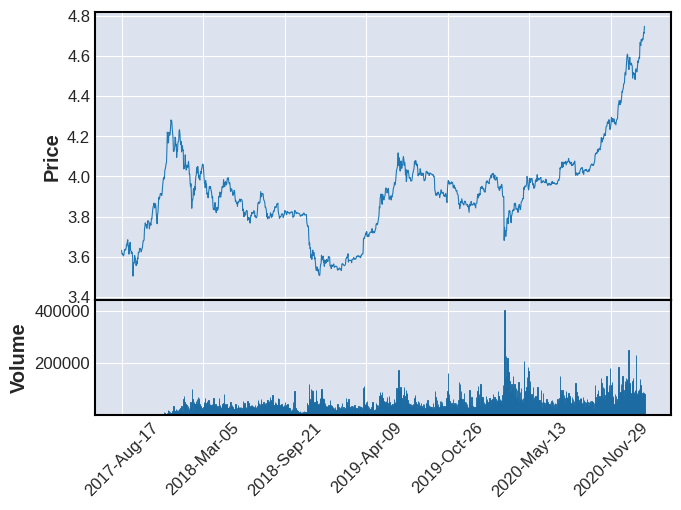

In [5]:
columns = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'ignore']
df = pd.DataFrame(klines, columns=columns)
df = df.iloc[:,:6].astype(float)
df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
df[columns[1:5]] = np.log10(df.iloc[:,1:5])
df = df.set_index('Open time')
df.head()
mpf.plot(df,type='line', volume=True)

In [6]:
timestep_in = 30
timestep_out = 10
n_features = 2

def split_sequence(df, timestep_in, timestep_out):
    X_out = []
    y_out = []
    for i in range(timestep_in, df.shape[0]-timestep_out):
        # print(i, i-timestep_in, i+timestep_out)
        X = df.iloc[i-timestep_in:i].to_numpy()
        y = df[['Close']].iloc[i:i+timestep_out].to_numpy()
        # print(y)
        X_out.append(X)
        y_out.append(y.T)
    return np.array(X_out), np.array(y_out)

# scaler = MinMaxScaler()
# scaler = StandardScaler()
# scaler.fit_transform(df[['Close']])[0:timestep_in].T.shape
# X, y = split_sequence(scaler.fit_transform(df[['Close']]), timestep_in, timestep_out)
X, y = split_sequence(df[['Close', 'Volume']], timestep_in, timestep_out)
# X.shape
# y.shape
# y = y.reshape((y.shape[0], y.shape[2]))
# X.shape
# y.shape
# print(X[-3:-1])
# print(y[-3:-1])
# X[:2]
# y[:2]

(1243, 30, 2)

(1243, 1, 10)

[[[4.60834211e+00 1.39789957e+05]
  [4.60301677e+00 7.57859797e+04]
  [4.58149477e+00 1.18209545e+05]
  [4.54905810e+00 2.49131540e+05]
  [4.53213293e+00 1.33948152e+05]
  [4.57253914e+00 1.24477915e+05]
  [4.59267075e+00 1.02950389e+05]
  [4.56516539e+00 1.18300921e+05]
  [4.55624194e+00 8.63484315e+04]
  [4.55422996e+00 8.01577274e+04]
  [4.56385198e+00 7.06981187e+04]
  [4.55499149e+00 7.96113078e+04]
  [4.54983952e+00 8.93684229e+04]
  [4.48925700e+00 1.31803183e+05]
  [4.51779175e+00 1.42971684e+05]
  [4.50620728e+00 6.45952877e+04]
  [4.50866302e+00 5.79780380e+04]
  [4.50858627e+00 8.84992269e+04]
  [4.51145246e+00 8.49722069e+04]
  [4.48238973e+00 9.59119617e+04]
  [4.52328931e+00 9.26211456e+04]
  [4.53468847e+00 2.31827006e+05]
  [4.53482387e+00 8.48896813e+04]
  [4.51973588e+00 6.87422804e+04]
  [4.52538653e+00 8.27182769e+04]
  [4.54981515e+00 7.80566599e+04]
  [4.57540575e+00 8.07843337e+04]
  [4.56745762e+00 9.20807359e+04]
  [4.58308809e+00 6.66813343e+04]
  [4.59314135e

In [10]:
K.clear_session()

In [8]:
# n_nodes = 12
# dropout_rate = 0.5

# inputs = Input(shape=(timestep_in, n_features))
# output = LSTM(timestep_in, return_sequences=True, dropout=dropout_rate)(inputs)
# output = LSTM(n_nodes, return_sequences=True, dropout=dropout_rate)(output)
# output = LSTM(n_nodes, return_sequences=True, dropout=dropout_rate)(output)
# output = LSTM(n_nodes, return_sequences=True, dropout=dropout_rate)(output)
# output = LSTM(n_nodes, return_sequences=True, dropout=dropout_rate)(output)
# output = LSTM(n_nodes, return_sequences=True, dropout=dropout_rate)(output)
# output = LSTM(n_nodes, return_sequences=True, dropout=dropout_rate)(output)
# output = LSTM(timestep_out)(output)
# output = Dense(timestep_out)(output)

# model = Model(inputs, output)
# model.compile(optimizer=Adam(lr=0.01), loss='mse', metrics=['accuracy'])
# model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30, 2)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 30, 30)            3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 12)            2064      
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 12)            1200      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 12)            1200      
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 12)            1200      
_________________________________________________________________
lstm_5 (LSTM)                (None, 30, 12)            1200  

In [24]:
n_nodes = 250
dropout_rate = 0.5

inputs = Input(shape=(timestep_in, n_features))
output = LSTM(timestep_in, return_sequences=True)(inputs)
output = LSTM(n_nodes, return_sequences=True)(output)
output = LSTM(n_nodes)(output)
output = Dense(timestep_out)(output)

model = Model(inputs, output)
model.compile(optimizer=Adam(lr=0.001), loss='mse', metrics=['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 30, 2)]           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 30, 30)            3960      
_________________________________________________________________
lstm_10 (LSTM)               (None, 30, 250)           281000    
_________________________________________________________________
lstm_11 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2510      
Total params: 788,470
Trainable params: 788,470
Non-trainable params: 0
_________________________________________________________________


In [25]:
training_result = model.fit(X, y, batch_size=32, epochs=800, validation_split=0.1, verbose=1)

Epoch 1/800
35/35 [==============================] - 4s 36ms/step - loss: 4.8488 - accuracy: 0.0989 - val_loss: 0.2430 - val_accuracy: 0.4005
Epoch 2/800
35/35 [==============================] - 0s 9ms/step - loss: 0.0331 - accuracy: 0.1576 - val_loss: 0.2425 - val_accuracy: 0.0572
Epoch 3/800
35/35 [==============================] - 0s 9ms/step - loss: 0.0269 - accuracy: 0.0909 - val_loss: 0.2720 - val_accuracy: 0.0966
Epoch 4/800
35/35 [==============================] - 0s 9ms/step - loss: 0.0242 - accuracy: 0.0612 - val_loss: 0.2852 - val_accuracy: 0.1582
Epoch 5/800
35/35 [==============================] - 0s 9ms/step - loss: 0.0249 - accuracy: 0.0808 - val_loss: 0.2333 - val_accuracy: 0.0409
Epoch 6/800
35/35 [==============================] - 0s 9ms/step - loss: 0.0242 - accuracy: 0.0798 - val_loss: 0.2400 - val_accuracy: 0.1582
Epoch 7/800
35/35 [==============================] - 0s 9ms/step - loss: 0.0239 - accuracy: 0.0854 - val_loss: 0.2733 - val_accuracy: 0.0409
Epoch 8/800


In [ ]:
tf.keras.models.save_model(model, 'drive/MyDrive/saved_models/bitcoin_3_1_lstm')

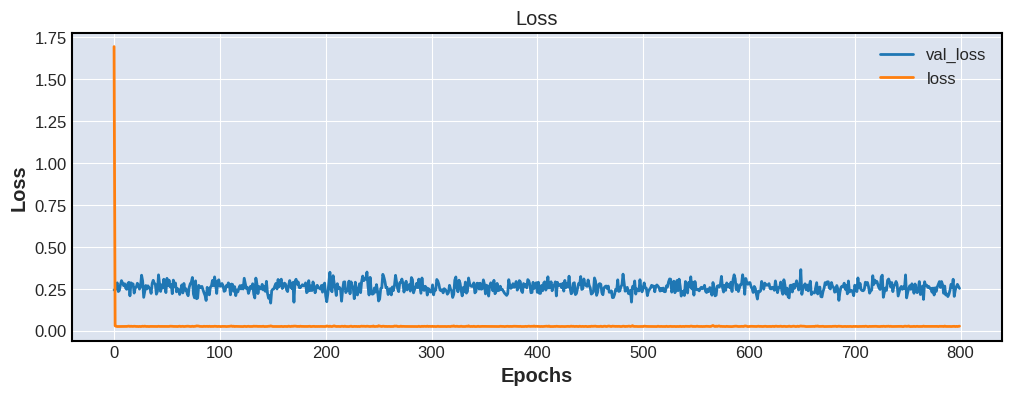

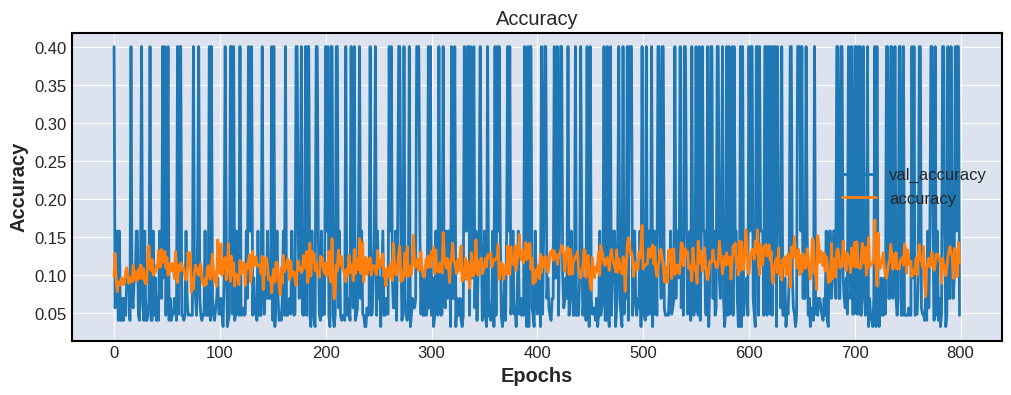

In [26]:
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

visualize_training_results(training_result)

In [ ]:
plt.figure(figsize=(12,5))

# Getting predictions by predicting from the last available X variable
yhat = model.predict(X[-1].reshape(1, timestep_in, n_features)).tolist()[0]

# Transforming values back to their normal prices
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

# Getting the actual values from the last available y variable which correspond to its respective X variable
actual = scaler.inverse_transform(y[-1].reshape(-1,1))

# Printing and plotting those predictions
print("Predicted Prices:\n", yhat)
plt.plot(yhat, label='Predicted')

# Printing and plotting the actual values
print("\nActual Prices:\n", actual.tolist())
plt.plot(actual.tolist(), label='Actual')

plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
# Predicting off of y because it contains the most recent dates
yhat = model.predict(np.array(df.tail(timestep_in)).reshape(1, timestep_in, n_features)).tolist()[0]

# Transforming the predicted values back to their original prices
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

# Creating a DF of the predicted prices
preds = pd.DataFrame(yhat, index=pd.date_range(start=df.index[-1], periods=len(yhat), freq="D"), columns=df.columns)

# Printing the predicted prices
print(preds)

# Number of periods back to visualize the actual values
pers = 10

# Transforming the actual values to their original price
actual = pd.DataFrame(scaler.inverse_transform(df[["Close"]].tail(pers)), index=df.Close.tail(pers).index, columns=df.columns).append(preds.head(1))

# Plotting
plt.figure(figsize=(16,6))
plt.plot(actual, label="Actual Prices")
plt.plot(preds, label="Predicted Prices")
plt.ylabel("Price")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(yhat)} days")
plt.legend()
plt.show()